<a href="https://colab.research.google.com/github/KavinduWeerasinghe/ML-assignment/blob/main/Test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
import pathlib
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)


228813984/228813984 [==============================] - 11s 0us/step


In [ ]:
print(flowers_data)


/root/.keras/datasets/flower_photos


In [ ]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))


/root/.keras/datasets/flower_photos/sunflowers/8481979626_98c9f88848_n.jpg


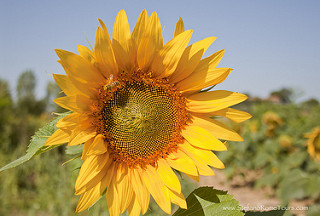

In [ ]:
import PIL
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[1]))

Pre-processing

In [ ]:
height,width=180,180
training_batch_size=32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_data,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(height,width),
    batch_size=training_batch_size)

image_cat = train_set.class_names
print(image_cat)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_data,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(height, width),
    batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


CNN model

In [ ]:
dnn_model = keras.Sequential()

imported_model= tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180,180,3),
    pooling='avg',classes=5,
    weights='imagenet')

for layer in imported_model.layers:
  layer.trainable=False


94765736/94765736 [==============================] - 5s 0us/step


Fine-tuning the model

In [ ]:
from tensorflow.python.keras.layers import Dense, Flatten

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [ ]:
dnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

Compiling the model

In [ ]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Fitting the dataset to the model

In [ ]:
history = dnn_model.fit(
train_set,
validation_data=validation_set,
epochs=10
)

Epoch 1/10
92/92 [==============================] - 23s 126ms/step - loss: 0.7723 - accuracy: 0.7572 - val_loss: 0.4414 - val_accuracy: 0.8556
Epoch 2/10
92/92 [==============================] - 9s 90ms/step - loss: 0.2819 - accuracy: 0.8982 - val_loss: 0.3475 - val_accuracy: 0.8706
Epoch 3/10
92/92 [==============================] - 9s 92ms/step - loss: 0.1657 - accuracy: 0.9428 - val_loss: 0.3777 - val_accuracy: 0.8529
Epoch 4/10
92/92 [==============================] - 10s 103ms/step - loss: 0.1090 - accuracy: 0.9636 - val_loss: 0.4516 - val_accuracy: 0.8488
Epoch 5/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0520 - accuracy: 0.9884 - val_loss: 0.3702 - val_accuracy: 0.8787
Epoch 6/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0315 - accuracy: 0.9956 - val_loss: 0.3939 - val_accuracy: 0.8801
Epoch 7/10
92/92 [==============================] - 10s 100ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.4179 - val_accuracy: 0.8869
Epo

Predicting

In [ ]:
import cv2
import numpy as np

image=cv2.imread(str(all_sunflowers[1]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
model_pred=dnn_model.predict(image)

predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)


1/1 [==============================] - 0s 24ms/step
The predicted category is sunflowers
